In [22]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

In [23]:
basepath = Path('/nobackup/users/straaten/ERA5/')
hotpath = basepath / 'tg-ex-q0.75-4D_1998-06-07_2019-08-31_1D_15-t2m-q095-adapted-mean.nc'
clusterpath = basepath / 'tg-anom_2000-01-01_2000-02-01_1D_15-t2m-q095-adapted-mean.nc'

In [28]:
clusters = xr.open_dataset(clusterpath)['clustidfield']

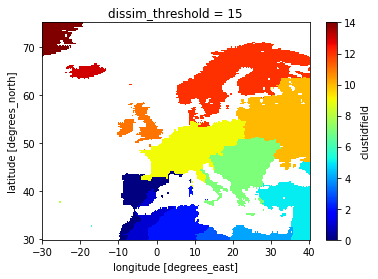

In [31]:
clusters.plot(cmap = 'jet')

In [32]:
da = xr.open_dataarray(hotpath)

In [33]:
df = da.to_dataframe().unstack(-1)

array([[<AxesSubplot:title={'center':"('tg-ex-q0.75-4D', 10)"}>,
        <AxesSubplot:title={'center':"('tg-ex-q0.75-4D', 12)"}>],
       [<AxesSubplot:title={'center':"('tg-ex-q0.75-4D', 14)"}>,
        <AxesSubplot:>]], dtype=object)

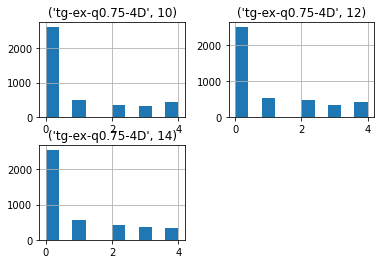

In [16]:
df.loc[slice(None,'2010-01-01'),(slice(None),[10,12,14])].hist()

<AxesSubplot:title={'center':'frequency of 4 day episodes per year'}, xlabel='time'>

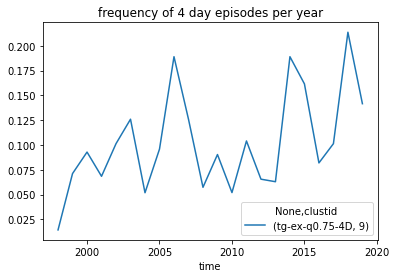

In [43]:
(df.loc[:,(slice(None),9)] == 4).groupby(df.index.year).apply(lambda d: d.sum()/d.count()).plot(title = 'frequency of 4 day episodes per year')

<AxesSubplot:title={'center':'amount of 0 day episodes per year'}, xlabel='time'>

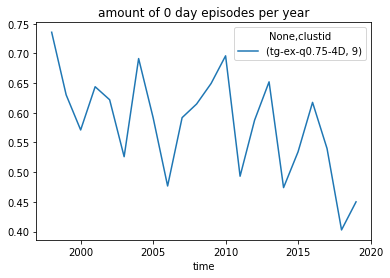

In [42]:
(df.loc[:,(slice(None),9)] == 0).groupby(df.index.year).apply(lambda d: d.sum()/d.count()).plot(title = 'frequency of 0 day episodes per year')

Trending behaviour is as expected. As temperatures rise (and we have a fixed quantile threshold in time) it will happen more often. So less non-occurrences, more chance of multiple occurrences (supposing probabilities are independent day-to-day). Noisy of course, and the first and last years are incomplete.

Quantile dependence on season should show that distribution is equal over the year.

<AxesSubplot:xlabel='time'>

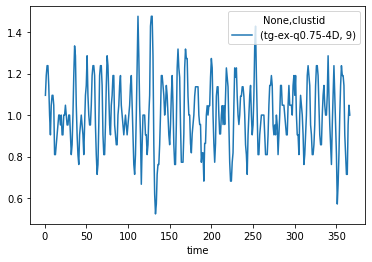

In [50]:
df.loc[:,(slice(None),9)].groupby(df.index.day_of_year).mean().plot()